In [4]:
#standard imports
import pandas as pd #pandas
import numpy as np #numpy
import pingouin as ping #one-liner anovas
import seaborn as sns #data viz
import matplotlib.pyplot as plt #data viz
from matplotlib.ticker import FormatStrFormatter #viz formatting

In [5]:
#Import data
data=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\total_desktop_data.csv")

In [6]:
#filter out users who didn't see an image/ have the opportunity to click
data_filtered=data[data["user_saw_image"]>0]

In [5]:
data_filtered

,exp,var,beacon,user_saw_image,user_clicked,total_impressions,total_clicks,user_participation,clicks_per_user
0,ImageReactionModule,image-reaction-bookmark,-uEfIpGzaw,1,0,1,0,0.0,NaN
2,ImageReactionModule,image-reaction-bookmark,0Lj-ronBF1,1,0,1,0,0.0,NaN
3,ImageReactionModule,image-reaction-bookmark,1IIgtogmnx,1,0,7,0,0.0,NaN
4,ImageReactionModule,image-reaction-bookmark,1IWHz0joxc,1,0,1,0,0.0,NaN
9,ImageReactionModule,image-reaction-bookmark,484JHf2kOD,1,0,1,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
271244,ImageReactionModule,image-reaction-thumbsup,tMCTTKEi9g,1,0,2,0,0.0,NaN
271246,ImageReactionModule,image-reaction-thumbsup,v1W4-usHyD,1,0,1,0,0.0,NaN
271247,ImageReactionModule,image-reaction-thumbsup,ve6QOHsYM0,1,0,1,0,0.0,NaN
271249,ImageReactionModule,image-reaction-thumbsup,ziUYJj3ddT,1,0,2,0,0.0,NaN


In [6]:
#filter users who did click at least once
data_clicks=data_filtered[data_filtered["user_clicked"]>0]

In [7]:
data_clicks

,exp,var,beacon,user_saw_image,user_clicked,total_impressions,total_clicks,user_participation,clicks_per_user
580,ImageReactionModule,image-reaction-bookmark,A39c6yV2UN,1,1,11,4,1.0,4.0
649,ImageReactionModule,image-reaction-bookmark,A3epmZD28l,1,1,219,2,1.0,2.0
774,ImageReactionModule,image-reaction-bookmark,A4TP6x3ZlK,1,1,19,1,1.0,1.0
1453,ImageReactionModule,image-reaction-bookmark,A96mEwtQNs,1,1,65,2,1.0,2.0
1469,ImageReactionModule,image-reaction-bookmark,A9DPQc9zwK,1,1,177,2,1.0,2.0
...,...,...,...,...,...,...,...,...,...
268344,ImageReactionModule,image-reaction-thumbsup,Fg7ayqhF1u,1,1,140,1,1.0,1.0
268358,ImageReactionModule,image-reaction-thumbsup,FgDs5W0wEJ,1,1,40,1,1.0,1.0
270472,ImageReactionModule,image-reaction-thumbsup,Fv09YeL2VW,1,1,15,2,1.0,2.0
270960,ImageReactionModule,image-reaction-thumbsup,FyUIKfPbRz,1,1,45,1,1.0,1.0


In [8]:
#run the ANOVA on the whole population
anova=ping.anova(data_clicks, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc      np2
0    var      4    701  1.237218  0.293665  0.00701


In [9]:
#Tukey's HSD on the whole population
tk=ping.pairwise_tukey(data=data_clicks, dv="total_clicks", between="var", effsize='cohen')
tk_sig=tk[tk["p-tukey"]<0.05]
tk_sig

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen


In [10]:
#Randomly sample 200 of our total population
sample_week=data_clicks.sample(n=200, random_state=1)

In [11]:
#run the ANOVA on the sample
anova=ping.anova(sample_week, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  1.375185  0.243957  0.027435


In [12]:
#Tukey's HSD on the sample
ping.pairwise_tukey(data=sample_week, dv="total_clicks", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,image-reaction-bookmark,image-reaction-brand-fire,2.243902,4.925000,-2.681098,5.028693,-0.533160,0.900000,-0.118489
1,image-reaction-bookmark,image-reaction-hearts,2.243902,2.045455,0.198448,4.911631,0.040404,0.900000,0.008770
2,image-reaction-bookmark,image-reaction-star,2.243902,12.384615,-10.140713,5.061221,-2.003610,0.268180,-0.448161
3,image-reaction-bookmark,image-reaction-thumbsup,2.243902,4.861111,-2.617209,5.168169,-0.506409,0.900000,-0.115666
4,image-reaction-brand-fire,image-reaction-hearts,4.925000,2.045455,2.879545,4.943310,0.582514,0.900000,0.127259
5,image-reaction-brand-fire,image-reaction-star,4.925000,12.384615,-7.459615,5.091969,-1.464977,0.575067,-0.329672
6,image-reaction-brand-fire,image-reaction-thumbsup,4.925000,4.861111,0.063889,5.198285,0.012290,0.900000,0.002824
7,image-reaction-hearts,image-reaction-star,2.045455,12.384615,-10.339161,4.976396,-2.077640,0.234031,-0.456931
8,image-reaction-hearts,image-reaction-thumbsup,2.045455,4.861111,-2.815657,5.085128,-0.553704,0.900000,-0.124436
9,image-reaction-star,image-reaction-thumbsup,12.384615,4.861111,7.523504,5.229758,1.438595,0.589958,0.332495


In [13]:
#import data from the 3 earliest days
data_abbrev=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\three_days_data.csv")

In [14]:
#filter users who did click at least once
data_clicks_abbrev=data_abbrev[data_abbrev["user_clicked"]>0]

In [15]:
#Randomly sample 200 of our abbreviated population
sample_abbrev=data_clicks_abbrev.sample(n=200, random_state=1)

In [16]:
#run the ANOVA on the sample
anova=ping.anova(sample_abbrev, dv="total_clicks", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  0.842634  0.499669  0.016991


In [17]:
#Tukey's HSD on the sample
tk=ping.pairwise_tukey(data=sample_abbrev, dv="total_clicks", between="var", effsize='cohen')

In [18]:
## This time do everything based on participation rate not just clicks ##
data_filtered["CTR"]=data_filtered["total_clicks"]/data_filtered["total_impressions"]

<ipython-input-18-4b825bb72bca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["CTR"]=data_filtered["total_clicks"]/data_filtered["total_impressions"]


In [19]:
#run the ANOVA on the whole population
anova=ping.anova(data_filtered, dv="CTR", between="var")
print(anova)

  Source  ddof1   ddof2         F    p-unc      np2
0    var      4  126460  2.852145  0.02234  0.00009


In [20]:
#Tukey's HSD on the sample
tk=ping.pairwise_tukey(data=data_filtered, dv="CTR", between="var", effsize='cohen')
tk_sig=tk[tk["p-tukey"]<0.05]
tk_sig

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,image-reaction-bookmark,image-reaction-brand-fire,0.000734,0.001692,-0.000958,0.000327,-2.928281,0.028158,-0.026078
2,image-reaction-bookmark,image-reaction-star,0.000734,0.001646,-0.000913,0.000327,-2.789858,0.042096,-0.024838


In [21]:
#Randomly sample 200 of our total population
sample_week_CTR=data_filtered.sample(n=200, random_state=3)

In [22]:
#run the ANOVA on the week long sample
anova=ping.anova(data=sample_week_CTR, dv="CTR", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  0.834167  0.504927  0.016823


In [23]:
#Tukey's HSD on the week long sample
ping.pairwise_tukey(data=sample_week_CTR, dv="CTR", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,image-reaction-bookmark,image-reaction-brand-fire,0.01087,0.0,0.01087,0.007606,1.429037,0.595352,0.306925
1,image-reaction-bookmark,image-reaction-hearts,0.01087,0.0,0.01087,0.007512,1.446939,0.585249,0.306925
2,image-reaction-bookmark,image-reaction-star,0.01087,0.0,0.01087,0.007943,1.368367,0.629596,0.306925
3,image-reaction-bookmark,image-reaction-thumbsup,0.01087,0.0,0.01087,0.007943,1.368367,0.629596,0.306925
4,image-reaction-brand-fire,image-reaction-hearts,0.00000,0.0,0.00000,0.007730,0.000000,0.900000,0.000000
5,image-reaction-brand-fire,image-reaction-star,0.00000,0.0,0.00000,0.008150,0.000000,0.900000,0.000000
6,image-reaction-brand-fire,image-reaction-thumbsup,0.00000,0.0,0.00000,0.008150,0.000000,0.900000,0.000000
7,image-reaction-hearts,image-reaction-star,0.00000,0.0,0.00000,0.008062,0.000000,0.900000,0.000000
8,image-reaction-hearts,image-reaction-thumbsup,0.00000,0.0,0.00000,0.008062,0.000000,0.900000,0.000000
9,image-reaction-star,image-reaction-thumbsup,0.00000,0.0,0.00000,0.008466,0.000000,0.900000,0.000000


In [24]:
#import data from the 3 earliest days
data_abbrev=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\three_days_data.csv")

In [25]:
#filter users who did click at least once
data_CTR_abbrev=data_abbrev[data_abbrev["user_saw_image"]>0]
data_CTR_abbrev["CTR"]=data_CTR_abbrev["total_clicks"]/data_CTR_abbrev["total_impressions"]

<ipython-input-25-eea36c2c9836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_CTR_abbrev["CTR"]=data_CTR_abbrev["total_clicks"]/data_CTR_abbrev["total_impressions"]


In [26]:
#Randomly sample 200 of our abbreviated population
sample_ctr_abbrev=data_CTR_abbrev.sample(n=200, random_state=2)

In [27]:
#run the ANOVA on the 3-day sample
anova=ping.anova(data=sample_ctr_abbrev, dv="CTR", between="var")
print(anova)

  Source  ddof1  ddof2         F     p-unc       np2
0    var      4    195  0.810734  0.519667  0.016358


In [28]:
#Tukey's HSD on the week long sample
ping.pairwise_tukey(data=sample_ctr_abbrev, dv="CTR", between="var", effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,image-reaction-bookmark,image-reaction-brand-fire,0.0,0.00000,0.00000,0.004806,0.000000,0.900000,0.000000
1,image-reaction-bookmark,image-reaction-hearts,0.0,0.00000,0.00000,0.004486,0.000000,0.900000,0.000000
2,image-reaction-bookmark,image-reaction-star,0.0,0.00000,0.00000,0.004314,0.000000,0.900000,0.000000
3,image-reaction-bookmark,image-reaction-thumbsup,0.0,0.00591,-0.00591,0.004293,-1.376641,0.624926,-0.300324
4,image-reaction-brand-fire,image-reaction-hearts,0.0,0.00000,0.00000,0.004779,0.000000,0.900000,0.000000
5,image-reaction-brand-fire,image-reaction-star,0.0,0.00000,0.00000,0.004618,0.000000,0.900000,0.000000
6,image-reaction-brand-fire,image-reaction-thumbsup,0.0,0.00591,-0.00591,0.004599,-1.285150,0.676569,-0.300324
7,image-reaction-hearts,image-reaction-star,0.0,0.00000,0.00000,0.004284,0.000000,0.900000,0.000000
8,image-reaction-hearts,image-reaction-thumbsup,0.0,0.00591,-0.00591,0.004263,-1.386505,0.619359,-0.300324
9,image-reaction-star,image-reaction-thumbsup,0.0,0.00591,-0.00591,0.004082,-1.448024,0.584639,-0.300324


In [29]:
#Is population click thru significant?
ping.ttest(data_filtered["CTR"], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

C:\Users\Victoria Guzik\anaconda3\lib\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-132.625426,126464,greater,1.0,"[0.0, inf]",0.372942,0.0e+00,0.0


In [30]:
#Is 200 sample week-long click thru significant?
ping.ttest(sample_week_CTR['CTR'], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.0,199,greater,0.999999,"[-0.0, inf]",0.353553,5.694e-05,0.0


In [31]:
#Is 200 first 3 days click thru significant?
ping.ttest(sample_ctr_abbrev['CTR'], 0.015, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-9.8,199,greater,1.0,"[-0.0, inf]",0.692965,9.65e-17,0.0


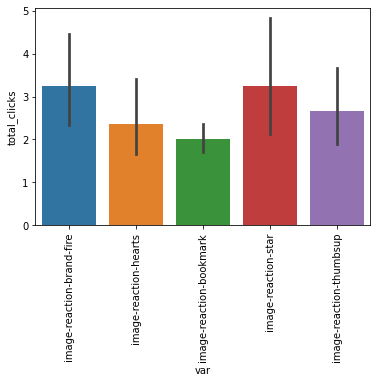

In [34]:
## Data Visualization ##
ax=sns.barplot(x="var", y="total_clicks", data=sample_abbrev)
ax.tick_params(axis='x', rotation=90)


In [7]:
counts=data_filtered.value_counts(["var", "user_clicked"]).reset_index()

counts_wide=counts.pivot_table(index="var", columns="user_clicked", values=0).reset_index()

counts_wide["total"]=counts_wide[0]+counts_wide[1]

counts_wide["Percent"]=counts_wide[1]/counts_wide["total"]

ping.ttest(counts_wide["Percent"], 0.0025, paired=False, alternative='greater', correction='auto', r=0.707, confidence=0.95) 

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.100631,4,greater,0.00349,"[0.0, inf]",2.281072,18.285,0.992606
